In [2]:
import pandas as pd 
import numpy as np 
import sklearn

In [3]:
dfTrain = pd.read_csv("train.csv")
dfTest = pd.read_csv("test.csv")
testLabels = pd.read_csv("submission.csv")

In [4]:
testLabels

,id,subscribed_predicted
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0
...,...,...
9995,9995,0
9996,9996,0
9997,9997,0
9998,9998,0


In [5]:
dfTrain
X_train, y_train = dfTrain.loc[:, dfTrain.columns[:-1]], dfTrain["subscribed"]
X_test = dfTest.loc[:, dfTest.columns]

In [6]:
X_train.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [7]:
y_train

0         no
1         no
2         no
3         no
4        yes
        ... 
29995     no
29996    yes
29997     no
29998     no
29999     no
Name: subscribed, Length: 30000, dtype: object

In [8]:
X_train

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,49,unemployed,married,basic.9y,no,yes,yes,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,4.955,5228.1
1,1,69,blue-collar,married,unknown,no,yes,no,cellular,aug,tue,3,999,0,nonexistent,-2.9,92.201,-31.4,0.883,5076.2
2,2,25,admin.,single,basic.9y,no,no,no,cellular,jul,mon,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1
3,3,43,services,married,basic.6y,unknown,no,no,cellular,jul,mon,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
4,4,27,admin.,single,university.degree,no,no,no,cellular,mar,tue,4,999,0,nonexistent,-1.8,93.369,-34.8,0.635,5008.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,36,admin.,married,university.degree,no,yes,yes,telephone,may,tue,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
29996,29996,46,technician,divorced,university.degree,unknown,yes,no,telephone,jul,fri,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
29997,29997,28,services,married,unknown,no,no,no,telephone,jun,fri,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
29998,29998,30,services,single,high.school,no,no,no,cellular,may,fri,3,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1


In [9]:
X_train.drop("id", axis=1, inplace=True)
X_test.drop("id", axis=1, inplace=True)

In [10]:
X_train_numeric = X_train.select_dtypes(include = np.number)
X_train_category = X_train.select_dtypes(exclude= np.number)
X_test_numeric = X_test.select_dtypes(include = np.number)
X_test_category = X_test.select_dtypes(exclude= np.number)

In [11]:
X_train_numeric.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,39.949233,2.563767,962.522567,0.173900,0.081227,93.575133,-40.499327,3.621459,5167.108613
std,10.405306,2.764596,186.800371,0.495715,1.572133,0.579706,4.631713,1.734181,72.230819
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
X_train_category.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,7656,18148,8859,23795,15693,24714,19027,9974,6327,25873


In [13]:
y_train.value_counts()

subscribed
no     26596
yes     3404
Name: count, dtype: int64

In [14]:
X_train_category["job"].value_counts()

job
admin.           7656
blue-collar      6732
technician       4939
services         2932
management       2107
retired          1218
entrepreneur     1025
self-employed     987
housemaid         776
unemployed        735
student           646
unknown           247
Name: count, dtype: int64

In [15]:
X_train_category["education"].value_counts()

education
university.degree      8859
high.school            6980
basic.9y               4396
professional.course    3834
basic.4y               3014
basic.6y               1655
unknown                1248
illiterate               14
Name: count, dtype: int64

In [16]:
X_train_category["loan"].value_counts()

loan
no         24714
yes         4556
unknown      730
Name: count, dtype: int64

In [17]:
X_train_category["default"].value_counts()

default
no         23795
unknown     6202
yes            3
Name: count, dtype: int64

In [18]:
X_train_category["marital"].value_counts()

marital
married     18148
single       8439
divorced     3358
unknown        55
Name: count, dtype: int64

In [19]:
X_train_category["housing"].value_counts()

housing
yes        15693
no         13577
unknown      730
Name: count, dtype: int64

In [20]:
X_train_category["contact"].value_counts()

contact
cellular     19027
telephone    10973
Name: count, dtype: int64

In [21]:
X_train_category["poutcome"].value_counts()

poutcome
nonexistent    25873
failure         3119
success         1008
Name: count, dtype: int64

In [22]:
X_train_category["month"].unique()

array(['jun', 'aug', 'jul', 'mar', 'nov', 'may', 'dec', 'apr', 'oct',
       'sep'], dtype=object)

In [23]:
X_train_category["day_of_week"].unique()

array(['thu', 'tue', 'mon', 'fri', 'wed'], dtype=object)

# Encoding
Okay co bude potřeba udělat u encodingu.
- Job -> U Jobu bych to viděl na ordinal encoding s tím že bude třeba ručně nastavit pořadí jednotlivých jobs. Unknown by se možná mohlo dát dropnout.
- Marital -> Vypadá v pohodě, myslím si, že bychom tam mohli prostě dát one hot encoding a možná unknown rozdělit equally do ostatních 3 values
- Education -> Opět si myslím, že se bude hodit ordinal encoding, custom pořadí jednotlivých jobs
- Default -> Je kinda weird, možná by se dal dropnout úplně
- Loan -> One hot encoding, vypadá v pohodě
- Housing -> Stejný počet unknowns jako v loanu, kouknout na to, možná dropnout rows a nebo prostě jenom one hot encoding 
- Contact -> Binary encoding prostě 
- Month a day of week -> Dát tam custom ordinal encoding a potom to převést do sin cos intervalu
- Poutcome -> Možná dropnout feature a nebo one hot encoding

In [24]:
X_train_category.loc[(X_train_category["marital"] == "unknown") & (X_train_category.index < int(.3*len(X_train_category))),"marital"] = "married"
X_train_category.loc[(X_train_category["marital"] == "unknown") & ((X_train_category.index >= int(.3*len(X_train_category))) & (X_train_category.index < int(.6*len(X_train_category)))),"marital"] = "single"
X_train_category.loc[(X_train_category["marital"] == "unknown") & (X_train_category.index >= int(.6*len(X_train_category))),"marital"] = "divorced"

X_train_category["marital"].value_counts()

X_test_category.loc[(X_test_category["marital"] == "unknown") & (X_test_category.index < int(.3*len(X_test_category))),"marital"] = "married"
X_test_category.loc[(X_test_category["marital"] == "unknown") & ((X_test_category.index >= int(.3*len(X_test_category))) & (X_test_category.index < int(.6*len(X_test_category)))),"marital"] = "single"
X_test_category.loc[(X_test_category["marital"] == "unknown") & (X_test_category.index >= int(.6*len(X_test_category))),"marital"] = "divorced"

In [25]:
import sklearn.preprocessing

X_category_encoded = pd.get_dummies(X_train_category, columns=['marital', 'loan', 'housing', 'poutcome'], drop_first=True)
X_category_encoded


,job,education,default,contact,month,day_of_week,marital_married,marital_single,loan_unknown,loan_yes,housing_unknown,housing_yes,poutcome_nonexistent,poutcome_success
0,unemployed,basic.9y,no,telephone,jun,thu,True,False,False,True,False,True,True,False
1,blue-collar,unknown,no,cellular,aug,tue,True,False,False,False,False,True,True,False
2,admin.,basic.9y,no,cellular,jul,mon,False,True,False,False,False,False,True,False
3,services,basic.6y,unknown,cellular,jul,mon,True,False,False,False,False,False,True,False
4,admin.,university.degree,no,cellular,mar,tue,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,admin.,university.degree,no,telephone,may,tue,True,False,False,True,False,True,True,False
29996,technician,university.degree,unknown,telephone,jul,fri,False,False,False,False,False,True,True,False
29997,services,unknown,no,telephone,jun,fri,True,False,False,False,False,False,True,False
29998,services,high.school,no,cellular,may,fri,False,True,False,False,False,False,False,False


In [26]:
jobEncoder = sklearn.preprocessing.OrdinalEncoder(categories=[["unknown", "unemployed", "student", "housemaid", "services", "admin.", "technician", "self-employed", "retired", "entrepreneur", "management", "blue-collar"]])
X_category_encoded["job"] = jobEncoder.fit_transform(np.array(X_category_encoded["job"]).reshape(-1, 1))
X_category_encoded

,job,education,default,contact,month,day_of_week,marital_married,marital_single,loan_unknown,loan_yes,housing_unknown,housing_yes,poutcome_nonexistent,poutcome_success
0,1.0,basic.9y,no,telephone,jun,thu,True,False,False,True,False,True,True,False
1,11.0,unknown,no,cellular,aug,tue,True,False,False,False,False,True,True,False
2,5.0,basic.9y,no,cellular,jul,mon,False,True,False,False,False,False,True,False
3,4.0,basic.6y,unknown,cellular,jul,mon,True,False,False,False,False,False,True,False
4,5.0,university.degree,no,cellular,mar,tue,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,5.0,university.degree,no,telephone,may,tue,True,False,False,True,False,True,True,False
29996,6.0,university.degree,unknown,telephone,jul,fri,False,False,False,False,False,True,True,False
29997,4.0,unknown,no,telephone,jun,fri,True,False,False,False,False,False,True,False
29998,4.0,high.school,no,cellular,may,fri,False,True,False,False,False,False,False,False


university.degree      8859  
high.school            6980  
basic.9y               4396  
professional.course    3834  
basic.4y               3014  
basic.6y               1655  
unknown                1248  
illiterate               14  

In [27]:
eduEncoder = sklearn.preprocessing.OrdinalEncoder(categories=[["unknown", "illiterate", "basic.4y", "basic.6y", "basic.9y", "high.school", "professional.course", "university.degree"]])
X_category_encoded["education"] = eduEncoder.fit_transform(np.array(X_category_encoded["education"]).reshape(-1, 1))
X_category_encoded

,job,education,default,contact,month,day_of_week,marital_married,marital_single,loan_unknown,loan_yes,housing_unknown,housing_yes,poutcome_nonexistent,poutcome_success
0,1.0,4.0,no,telephone,jun,thu,True,False,False,True,False,True,True,False
1,11.0,0.0,no,cellular,aug,tue,True,False,False,False,False,True,True,False
2,5.0,4.0,no,cellular,jul,mon,False,True,False,False,False,False,True,False
3,4.0,3.0,unknown,cellular,jul,mon,True,False,False,False,False,False,True,False
4,5.0,7.0,no,cellular,mar,tue,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,5.0,7.0,no,telephone,may,tue,True,False,False,True,False,True,True,False
29996,6.0,7.0,unknown,telephone,jul,fri,False,False,False,False,False,True,True,False
29997,4.0,0.0,no,telephone,jun,fri,True,False,False,False,False,False,True,False
29998,4.0,5.0,no,cellular,may,fri,False,True,False,False,False,False,False,False


In [28]:
binaryEncoder = sklearn.preprocessing.OrdinalEncoder()
X_category_encoded["contact"] = binaryEncoder.fit_transform(np.array(X_category_encoded["contact"]).reshape(-1, 1))
X_category_encoded

,job,education,default,contact,month,day_of_week,marital_married,marital_single,loan_unknown,loan_yes,housing_unknown,housing_yes,poutcome_nonexistent,poutcome_success
0,1.0,4.0,no,1.0,jun,thu,True,False,False,True,False,True,True,False
1,11.0,0.0,no,0.0,aug,tue,True,False,False,False,False,True,True,False
2,5.0,4.0,no,0.0,jul,mon,False,True,False,False,False,False,True,False
3,4.0,3.0,unknown,0.0,jul,mon,True,False,False,False,False,False,True,False
4,5.0,7.0,no,0.0,mar,tue,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,5.0,7.0,no,1.0,may,tue,True,False,False,True,False,True,True,False
29996,6.0,7.0,unknown,1.0,jul,fri,False,False,False,False,False,True,True,False
29997,4.0,0.0,no,1.0,jun,fri,True,False,False,False,False,False,True,False
29998,4.0,5.0,no,0.0,may,fri,False,True,False,False,False,False,False,False


In [29]:
monthEncoder = sklearn.preprocessing.OrdinalEncoder(categories=[["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]])
X_category_encoded["month"] = monthEncoder.fit_transform(np.array(X_category_encoded["month"]).reshape(-1, 1))
X_category_encoded

,job,education,default,contact,month,day_of_week,marital_married,marital_single,loan_unknown,loan_yes,housing_unknown,housing_yes,poutcome_nonexistent,poutcome_success
0,1.0,4.0,no,1.0,5.0,thu,True,False,False,True,False,True,True,False
1,11.0,0.0,no,0.0,7.0,tue,True,False,False,False,False,True,True,False
2,5.0,4.0,no,0.0,6.0,mon,False,True,False,False,False,False,True,False
3,4.0,3.0,unknown,0.0,6.0,mon,True,False,False,False,False,False,True,False
4,5.0,7.0,no,0.0,2.0,tue,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,5.0,7.0,no,1.0,4.0,tue,True,False,False,True,False,True,True,False
29996,6.0,7.0,unknown,1.0,6.0,fri,False,False,False,False,False,True,True,False
29997,4.0,0.0,no,1.0,5.0,fri,True,False,False,False,False,False,True,False
29998,4.0,5.0,no,0.0,4.0,fri,False,True,False,False,False,False,False,False


In [30]:
dayEncoder = sklearn.preprocessing.OrdinalEncoder(categories=[["mon", "tue", "wed", "thu", "fri"]])
X_category_encoded["day_of_week"] = dayEncoder.fit_transform(np.array(X_category_encoded["day_of_week"]).reshape(-1, 1))
X_category_encoded

,job,education,default,contact,month,day_of_week,marital_married,marital_single,loan_unknown,loan_yes,housing_unknown,housing_yes,poutcome_nonexistent,poutcome_success
0,1.0,4.0,no,1.0,5.0,3.0,True,False,False,True,False,True,True,False
1,11.0,0.0,no,0.0,7.0,1.0,True,False,False,False,False,True,True,False
2,5.0,4.0,no,0.0,6.0,0.0,False,True,False,False,False,False,True,False
3,4.0,3.0,unknown,0.0,6.0,0.0,True,False,False,False,False,False,True,False
4,5.0,7.0,no,0.0,2.0,1.0,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,5.0,7.0,no,1.0,4.0,1.0,True,False,False,True,False,True,True,False
29996,6.0,7.0,unknown,1.0,6.0,4.0,False,False,False,False,False,True,True,False
29997,4.0,0.0,no,1.0,5.0,4.0,True,False,False,False,False,False,True,False
29998,4.0,5.0,no,0.0,4.0,4.0,False,True,False,False,False,False,False,False


In [31]:
X_category_encoded["default"] = binaryEncoder.fit_transform(np.array(X_category_encoded["default"]).reshape(-1, 1))
X_category_encoded

,job,education,default,contact,month,day_of_week,marital_married,marital_single,loan_unknown,loan_yes,housing_unknown,housing_yes,poutcome_nonexistent,poutcome_success
0,1.0,4.0,0.0,1.0,5.0,3.0,True,False,False,True,False,True,True,False
1,11.0,0.0,0.0,0.0,7.0,1.0,True,False,False,False,False,True,True,False
2,5.0,4.0,0.0,0.0,6.0,0.0,False,True,False,False,False,False,True,False
3,4.0,3.0,1.0,0.0,6.0,0.0,True,False,False,False,False,False,True,False
4,5.0,7.0,0.0,0.0,2.0,1.0,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,5.0,7.0,0.0,1.0,4.0,1.0,True,False,False,True,False,True,True,False
29996,6.0,7.0,1.0,1.0,6.0,4.0,False,False,False,False,False,True,True,False
29997,4.0,0.0,0.0,1.0,5.0,4.0,True,False,False,False,False,False,True,False
29998,4.0,5.0,0.0,0.0,4.0,4.0,False,True,False,False,False,False,False,False


In [32]:
def sin_transformer(period):
	return sklearn.preprocessing.FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
	return sklearn.preprocessing.FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

In [33]:
X_category_encoded["month_sin"] = sin_transformer(12).fit_transform(X_category_encoded)["month"]
X_category_encoded["month_cos"] = cos_transformer(12).fit_transform(X_category_encoded)["month"]

X_category_encoded["day_sin"] = sin_transformer(5).fit_transform(X_category_encoded)["day_of_week"]
X_category_encoded["day_cos"] = cos_transformer(5).fit_transform(X_category_encoded)["day_of_week"]
X_category_encoded

,job,education,default,contact,month,day_of_week,marital_married,marital_single,loan_unknown,loan_yes,housing_unknown,housing_yes,poutcome_nonexistent,poutcome_success,month_sin,month_cos,day_sin,day_cos
0,1.0,4.0,0.0,1.0,5.0,3.0,True,False,False,True,False,True,True,False,5.000000e-01,-0.866025,-0.587785,-0.809017
1,11.0,0.0,0.0,0.0,7.0,1.0,True,False,False,False,False,True,True,False,-5.000000e-01,-0.866025,0.951057,0.309017
2,5.0,4.0,0.0,0.0,6.0,0.0,False,True,False,False,False,False,True,False,1.224647e-16,-1.000000,0.000000,1.000000
3,4.0,3.0,1.0,0.0,6.0,0.0,True,False,False,False,False,False,True,False,1.224647e-16,-1.000000,0.000000,1.000000
4,5.0,7.0,0.0,0.0,2.0,1.0,False,True,False,False,False,False,True,False,8.660254e-01,0.500000,0.951057,0.309017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,5.0,7.0,0.0,1.0,4.0,1.0,True,False,False,True,False,True,True,False,8.660254e-01,-0.500000,0.951057,0.309017
29996,6.0,7.0,1.0,1.0,6.0,4.0,False,False,False,False,False,True,True,False,1.224647e-16,-1.000000,-0.951057,0.309017
29997,4.0,0.0,0.0,1.0,5.0,4.0,True,False,False,False,False,False,True,False,5.000000e-01,-0.866025,-0.951057,0.309017
29998,4.0,5.0,0.0,0.0,4.0,4.0,False,True,False,False,False,False,False,False,8.660254e-01,-0.500000,-0.951057,0.309017


In [34]:
X_category_encoded.drop(labels=["month", "day_of_week"], inplace=True, axis=1)
X_category_encoded

,job,education,default,contact,marital_married,marital_single,loan_unknown,loan_yes,housing_unknown,housing_yes,poutcome_nonexistent,poutcome_success,month_sin,month_cos,day_sin,day_cos
0,1.0,4.0,0.0,1.0,True,False,False,True,False,True,True,False,5.000000e-01,-0.866025,-0.587785,-0.809017
1,11.0,0.0,0.0,0.0,True,False,False,False,False,True,True,False,-5.000000e-01,-0.866025,0.951057,0.309017
2,5.0,4.0,0.0,0.0,False,True,False,False,False,False,True,False,1.224647e-16,-1.000000,0.000000,1.000000
3,4.0,3.0,1.0,0.0,True,False,False,False,False,False,True,False,1.224647e-16,-1.000000,0.000000,1.000000
4,5.0,7.0,0.0,0.0,False,True,False,False,False,False,True,False,8.660254e-01,0.500000,0.951057,0.309017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,5.0,7.0,0.0,1.0,True,False,False,True,False,True,True,False,8.660254e-01,-0.500000,0.951057,0.309017
29996,6.0,7.0,1.0,1.0,False,False,False,False,False,True,True,False,1.224647e-16,-1.000000,-0.951057,0.309017
29997,4.0,0.0,0.0,1.0,True,False,False,False,False,False,True,False,5.000000e-01,-0.866025,-0.951057,0.309017
29998,4.0,5.0,0.0,0.0,False,True,False,False,False,False,False,False,8.660254e-01,-0.500000,-0.951057,0.309017


In [35]:
X_train = pd.concat([X_train_numeric, X_category_encoded], axis=1)
X_train

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,...,loan_unknown,loan_yes,housing_unknown,housing_yes,poutcome_nonexistent,poutcome_success,month_sin,month_cos,day_sin,day_cos
0,49,1,999,0,1.4,94.465,-41.8,4.955,5228.1,1.0,...,False,True,False,True,True,False,5.000000e-01,-0.866025,-0.587785,-0.809017
1,69,3,999,0,-2.9,92.201,-31.4,0.883,5076.2,11.0,...,False,False,False,True,True,False,-5.000000e-01,-0.866025,0.951057,0.309017
2,25,1,999,0,1.4,93.918,-42.7,4.960,5228.1,5.0,...,False,False,False,False,True,False,1.224647e-16,-1.000000,0.000000,1.000000
3,43,1,999,0,1.4,93.918,-42.7,4.962,5228.1,4.0,...,False,False,False,False,True,False,1.224647e-16,-1.000000,0.000000,1.000000
4,27,4,999,0,-1.8,93.369,-34.8,0.635,5008.7,5.0,...,False,False,False,False,True,False,8.660254e-01,0.500000,0.951057,0.309017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,36,2,999,0,1.1,93.994,-36.4,4.857,5191.0,5.0,...,False,True,False,True,True,False,8.660254e-01,-0.500000,0.951057,0.309017
29996,46,4,999,0,1.4,93.918,-42.7,4.962,5228.1,6.0,...,False,False,False,True,True,False,1.224647e-16,-1.000000,-0.951057,0.309017
29997,28,2,999,0,1.4,94.465,-41.8,4.959,5228.1,4.0,...,False,False,False,False,True,False,5.000000e-01,-0.866025,-0.951057,0.309017
29998,30,3,999,1,-1.8,92.893,-46.2,1.250,5099.1,4.0,...,False,False,False,False,False,False,8.660254e-01,-0.500000,-0.951057,0.309017


In [36]:
y_train = binaryEncoder.fit_transform(np.array(y_train).reshape(-1, 1))
corrDf = X_train.copy()
corrDf["label"] = y_train
corr = corrDf.corr()

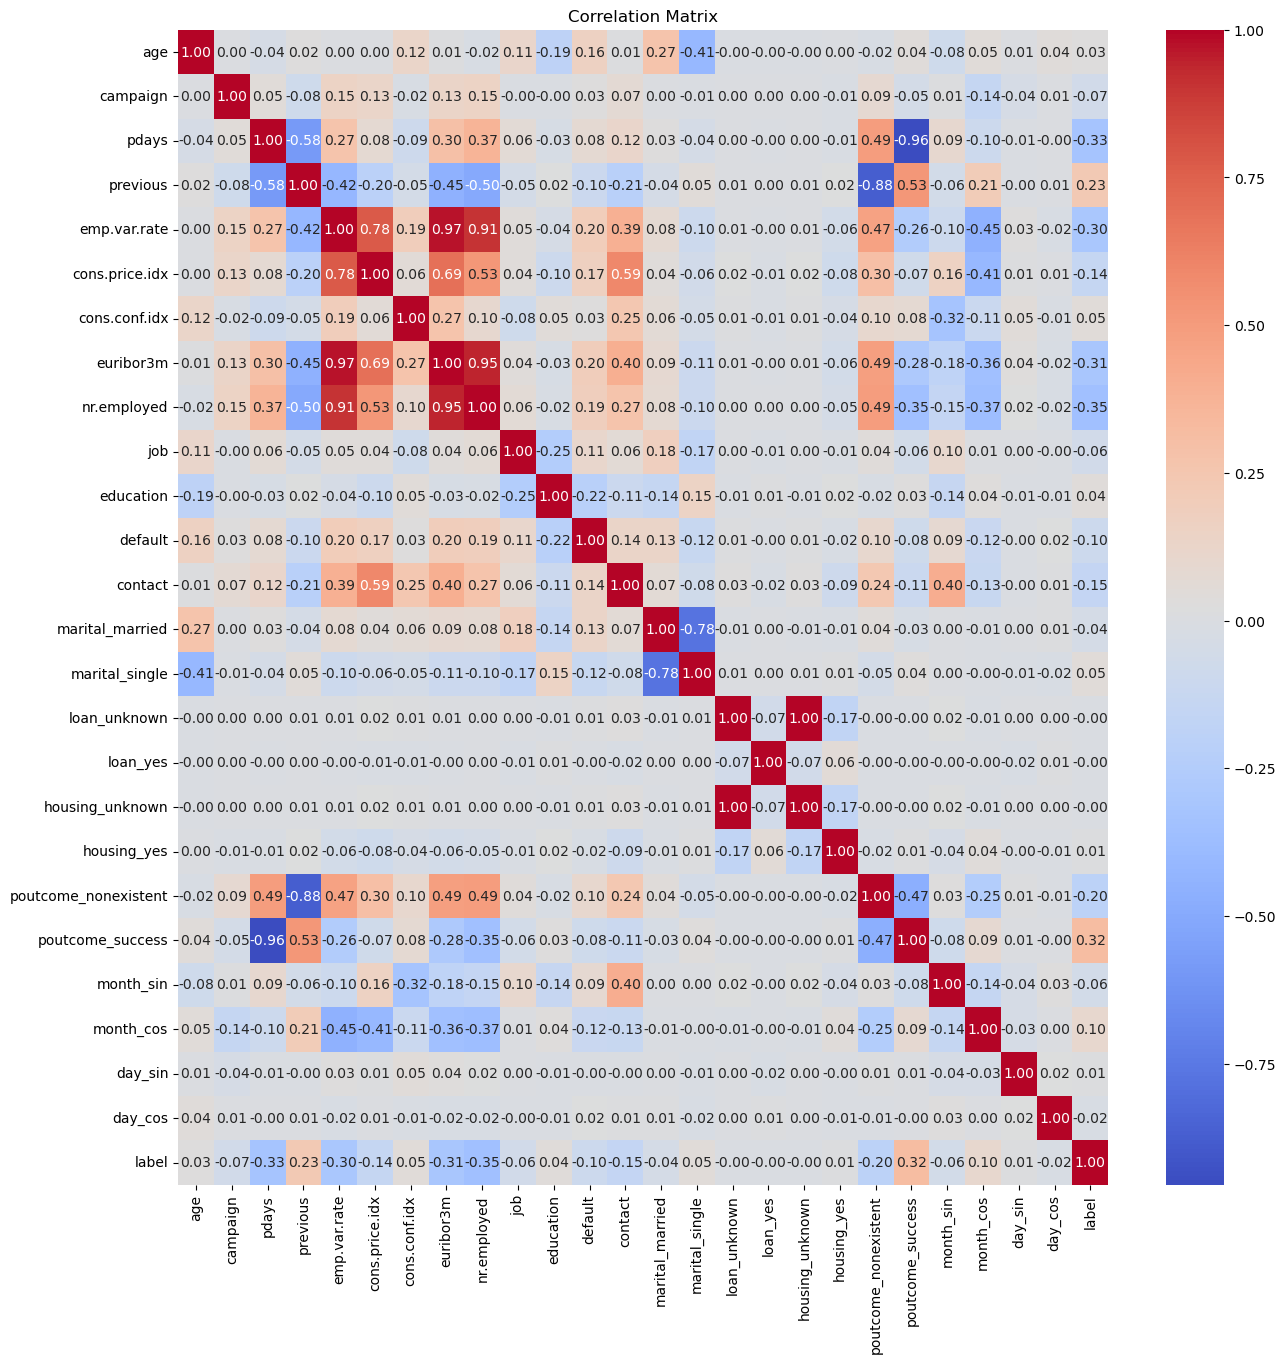

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [38]:
def encodingPipeline(X_train): # Should just transform for X_test, for now it also fits it
    X_category_encoded = pd.get_dummies(X_train, columns=['marital', 'loan', 'housing', 'poutcome'], drop_first=True)
    jobEncoder = sklearn.preprocessing.OrdinalEncoder(categories=[["unknown", "unemployed", "student", "housemaid", "services", "admin.", "technician", "self-employed", "retired", "entrepreneur", "management", "blue-collar"]])
    X_category_encoded["job"] = jobEncoder.fit_transform(np.array(X_category_encoded["job"]).reshape(-1, 1))
    eduEncoder = sklearn.preprocessing.OrdinalEncoder(categories=[["unknown", "illiterate", "basic.4y", "basic.6y", "basic.9y", "high.school", "professional.course", "university.degree"]])
    X_category_encoded["education"] = eduEncoder.fit_transform(np.array(X_category_encoded["education"]).reshape(-1, 1))
    binaryEncoder = sklearn.preprocessing.OrdinalEncoder()
    X_category_encoded["contact"] = binaryEncoder.fit_transform(np.array(X_category_encoded["contact"]).reshape(-1, 1))
    monthEncoder = sklearn.preprocessing.OrdinalEncoder(categories=[["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]])
    X_category_encoded["month"] = monthEncoder.fit_transform(np.array(X_category_encoded["month"]).reshape(-1, 1))
    dayEncoder = sklearn.preprocessing.OrdinalEncoder(categories=[["mon", "tue", "wed", "thu", "fri"]])
    X_category_encoded["day_of_week"] = dayEncoder.fit_transform(np.array(X_category_encoded["day_of_week"]).reshape(-1, 1))
    X_category_encoded["default"] = binaryEncoder.fit_transform(np.array(X_category_encoded["default"]).reshape(-1, 1))

    X_category_encoded["month_sin"] = sin_transformer(12).fit_transform(X_category_encoded)["month"]
    X_category_encoded["month_cos"] = cos_transformer(12).fit_transform(X_category_encoded)["month"]

    X_category_encoded["day_sin"] = sin_transformer(5).fit_transform(X_category_encoded)["day_of_week"]
    X_category_encoded["day_cos"] = cos_transformer(5).fit_transform(X_category_encoded)["day_of_week"]
    X_category_encoded.drop(labels=["month", "day_of_week"], inplace=True, axis=1)
    return X_category_encoded
    

    

In [39]:
X_train_encoded = encodingPipeline(X_train_category)
X_test_encoded = encodingPipeline(X_test_category)
X_train = pd.concat([X_train_numeric, X_train_encoded], axis=1)
X_test = pd.concat([X_test_numeric, X_test_encoded], axis=1)
y_train = binaryEncoder.fit_transform(np.array(y_train).reshape(-1, 1))
X_train

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,...,loan_unknown,loan_yes,housing_unknown,housing_yes,poutcome_nonexistent,poutcome_success,month_sin,month_cos,day_sin,day_cos
0,49,1,999,0,1.4,94.465,-41.8,4.955,5228.1,1.0,...,False,True,False,True,True,False,5.000000e-01,-0.866025,-0.587785,-0.809017
1,69,3,999,0,-2.9,92.201,-31.4,0.883,5076.2,11.0,...,False,False,False,True,True,False,-5.000000e-01,-0.866025,0.951057,0.309017
2,25,1,999,0,1.4,93.918,-42.7,4.960,5228.1,5.0,...,False,False,False,False,True,False,1.224647e-16,-1.000000,0.000000,1.000000
3,43,1,999,0,1.4,93.918,-42.7,4.962,5228.1,4.0,...,False,False,False,False,True,False,1.224647e-16,-1.000000,0.000000,1.000000
4,27,4,999,0,-1.8,93.369,-34.8,0.635,5008.7,5.0,...,False,False,False,False,True,False,8.660254e-01,0.500000,0.951057,0.309017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,36,2,999,0,1.1,93.994,-36.4,4.857,5191.0,5.0,...,False,True,False,True,True,False,8.660254e-01,-0.500000,0.951057,0.309017
29996,46,4,999,0,1.4,93.918,-42.7,4.962,5228.1,6.0,...,False,False,False,True,True,False,1.224647e-16,-1.000000,-0.951057,0.309017
29997,28,2,999,0,1.4,94.465,-41.8,4.959,5228.1,4.0,...,False,False,False,False,True,False,5.000000e-01,-0.866025,-0.951057,0.309017
29998,30,3,999,1,-1.8,92.893,-46.2,1.250,5099.1,4.0,...,False,False,False,False,False,False,8.660254e-01,-0.500000,-0.951057,0.309017


In [40]:
X_test

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,...,loan_unknown,loan_yes,housing_unknown,housing_yes,poutcome_nonexistent,poutcome_success,month_sin,month_cos,day_sin,day_cos
0,33,1,999,0,1.4,93.444,-36.1,4.965,5228.1,5.0,...,False,False,False,False,True,False,-0.500000,-8.660254e-01,0.000000,1.000000
1,48,4,999,0,1.1,93.994,-36.4,4.864,5191.0,11.0,...,False,False,False,False,True,False,0.866025,-5.000000e-01,-0.951057,0.309017
2,33,2,6,2,-3.4,92.431,-26.9,0.731,5017.5,5.0,...,False,False,False,True,False,False,-1.000000,-1.836970e-16,0.000000,1.000000
3,42,3,999,0,1.1,93.994,-36.4,4.856,5191.0,5.0,...,False,False,False,False,True,False,0.866025,-5.000000e-01,0.951057,0.309017
4,46,1,999,1,-0.1,93.200,-42.0,4.076,5195.8,5.0,...,False,False,False,True,False,False,-0.866025,5.000000e-01,-0.587785,-0.809017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,31,1,999,0,1.4,93.444,-36.1,4.967,5228.1,5.0,...,False,False,False,True,True,False,-0.500000,-8.660254e-01,0.587785,-0.809017
9996,34,4,999,0,-1.8,93.075,-47.1,1.406,5099.1,0.0,...,False,True,False,True,True,False,1.000000,6.123234e-17,-0.587785,-0.809017
9997,45,1,999,0,-1.8,92.893,-46.2,1.313,5099.1,6.0,...,False,False,False,False,True,False,0.866025,-5.000000e-01,-0.951057,0.309017
9998,48,3,999,0,1.4,93.444,-36.1,4.968,5228.1,11.0,...,False,False,False,False,True,False,-0.500000,-8.660254e-01,-0.587785,-0.809017


In [41]:
import sklearn.ensemble

rf = sklearn.ensemble.RandomForestClassifier()
rf.fit(X_train, y_train.ravel())
predictions = rf.predict(X_test)
predictions = [int(i) for i in predictions]

In [42]:
pd.DataFrame({"subscribed_predicted": predictions}).to_csv("submission2.csv", index_label="id")

In [43]:
rf.feature_importances_

array([0.18389722, 0.08513844, 0.0351702 , 0.01634336, 0.02038903,
       0.02248979, 0.02407023, 0.12296893, 0.05883861, 0.0890749 ,
       0.07499862, 0.01427958, 0.01454953, 0.02128678, 0.01763041,
       0.00333293, 0.02378302, 0.00363014, 0.03726179, 0.01038257,
       0.02824921, 0.01451493, 0.01053901, 0.03994453, 0.02723626])

In [44]:
importantFeatures = [X_train.columns[i] for i in range(0, len(rf.feature_importances_)) if rf.feature_importances_[i] >= 0.029]
importantFeatures

['age',
 'campaign',
 'pdays',
 'euribor3m',
 'nr.employed',
 'job',
 'education',
 'housing_yes',
 'day_sin']

In [45]:
X_train_reduced = X_train[importantFeatures]
X_test_reduced = X_test[importantFeatures]

In [46]:
rf = sklearn.ensemble.RandomForestClassifier()
rf.fit(X_train_reduced, y_train.ravel())
predictions = rf.predict(X_test_reduced)
predictions = [int(i) for i in predictions]
pd.DataFrame({"subscribed_predicted": predictions}).to_csv("submission2.csv", index_label="id")

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define the classifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],        # Number of features to consider when looking for the best split
    'bootstrap': [True, False]               # Whether bootstrap samples are used when building trees
}

# Define the scoring function
scorer = make_scorer(f1_score, average='weighted')  # 'weighted' considers class imbalance

# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available processors
    verbose=2   # Print progress during the search
)

# Fit the model (replace X_train and y_train with your data)
grid_search.fit(X_train, y_train)

# Display the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


d:\Anaconda\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best F1 Score: 0.8795474966745307


Best Parameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best F1 Score: 0.8795474966745307

In [49]:
hyperOPForest = grid_search.best_estimator_
predictions = hyperOPForest.predict(X_test)
predictions = [int(i) for i in predictions]
pd.DataFrame({"subscribed_predicted": predictions}).to_csv("submission2.csv", index_label="id")


In [50]:
predictions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [51]:
hyperOPForest.feature_importances_

array([0.13317788, 0.05759596, 0.0773259 , 0.02029206, 0.03355446,
       0.0258051 , 0.03884097, 0.16506634, 0.08449773, 0.06822696,
       0.05479253, 0.01121818, 0.01810339, 0.01409942, 0.01263566,
       0.00423607, 0.01753641, 0.00388362, 0.01857951, 0.01080261,
       0.03661165, 0.02298162, 0.01251313, 0.03452999, 0.02309284])

In [79]:
X_train_numeric = dfTrain.select_dtypes(include=np.number)
X_train_numeric.drop("id", axis=1, inplace=True)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>,
        <Axes: title={'center': 'cons.price.idx'}>],
       [<Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>,
        <Axes: title={'center': 'nr.employed'}>]], dtype=object)

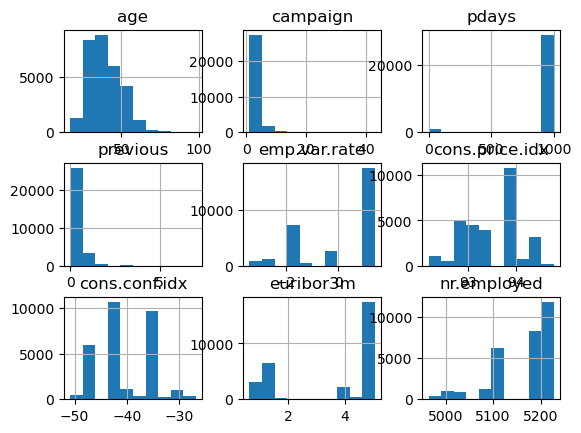

In [80]:
X_train_numeric.hist()

In [81]:
X_train_numeric.loc[(X_train_numeric["pdays"] == 999),"pdays"] = -1

In [82]:
# Filter outliers
for col in X_train_numeric.columns:
    X_train_numeric['z_score' + col] = (X_train_numeric[col] - X_train_numeric[col].mean())/X_train_numeric[col].std()
    X_train_numeric = X_train_numeric.loc[(X_train_numeric['z_score' + col] <= 2) & (X_train_numeric['z_score' + col] >= -2),:]
    X_train_numeric.drop('z_score' + col, axis=1, inplace=True)

In [83]:
X_train_numeric

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,49,1,-1,0,1.4,94.465,-41.8,4.955,5228.1
2,25,1,-1,0,1.4,93.918,-42.7,4.960,5228.1
3,43,1,-1,0,1.4,93.918,-42.7,4.962,5228.1
5,31,1,-1,0,1.4,93.444,-36.1,4.965,5228.1
6,55,2,-1,0,1.4,93.918,-42.7,4.963,5228.1
...,...,...,...,...,...,...,...,...,...
29989,35,2,-1,0,1.4,93.444,-36.1,4.968,5228.1
29994,49,1,-1,0,1.4,93.918,-42.7,4.960,5228.1
29995,36,2,-1,0,1.1,93.994,-36.4,4.857,5191.0
29996,46,4,-1,0,1.4,93.918,-42.7,4.962,5228.1


In [84]:
import sklearn.preprocessing
cols = X_train_numeric.columns[1:] # skip age
standardScaler = sklearn.preprocessing.StandardScaler()
robustScaler = sklearn.preprocessing.RobustScaler()
X_train_scaled = X_train_numeric
X_train_scaled["age"] = standardScaler.fit_transform(np.array(X_train_numeric["age"]).reshape(-1,1))
X_train_scaled[cols] = robustScaler.fit_transform(X_train_numeric[cols])
X_train_scaled

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.971989,-0.5,0.0,0.0,0.0,0.994545,0.000000,-0.028302,0.0
2,-1.642383,-0.5,0.0,0.0,0.0,0.000000,-0.160714,0.018868,0.0
3,0.318396,-0.5,0.0,0.0,0.0,0.000000,-0.160714,0.037736,0.0
5,-0.988790,-0.5,0.0,0.0,0.0,-0.861818,1.017857,0.066038,0.0
6,1.625581,0.0,0.0,0.0,0.0,0.000000,-0.160714,0.047170,0.0
...,...,...,...,...,...,...,...,...,...
29989,-0.553062,0.0,0.0,0.0,0.0,-0.861818,1.017857,0.094340,0.0
29994,0.971989,-0.5,0.0,0.0,0.0,0.000000,-0.160714,0.018868,0.0
29995,-0.444130,0.0,0.0,0.0,-1.0,0.138182,0.964286,-0.952830,-1.0
29996,0.645192,1.0,0.0,0.0,0.0,0.000000,-0.160714,0.037736,0.0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>,
        <Axes: title={'center': 'cons.price.idx'}>],
       [<Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>,
        <Axes: title={'center': 'nr.employed'}>]], dtype=object)

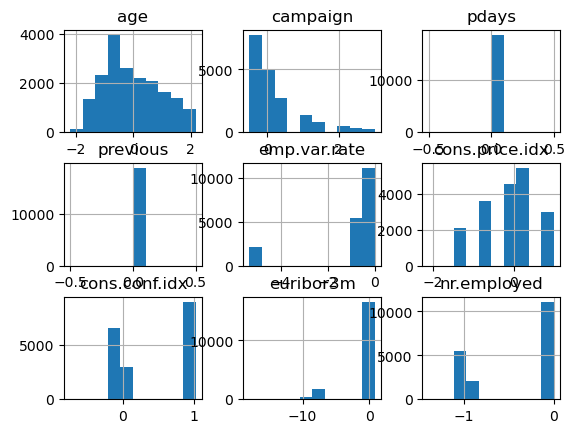

In [85]:
X_train_scaled.hist()

<Axes: >

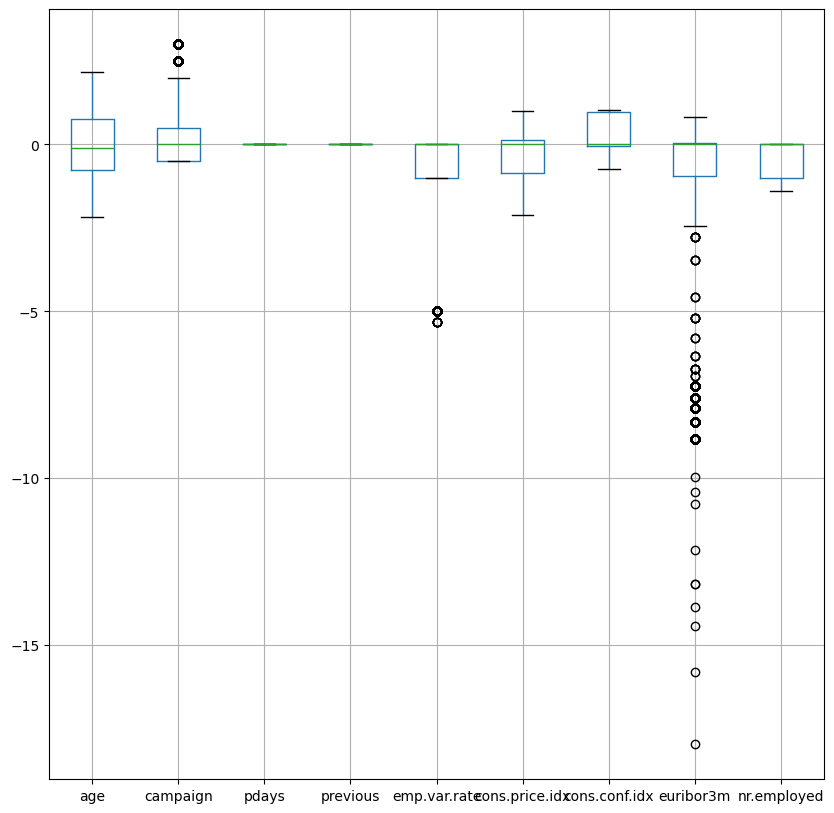

In [88]:
X_train_scaled.boxplot(figsize=(10,10))

In [119]:
def scalingPipelineFilter(X_train_numeric, filter = True):
    X_train_numeric.loc[(X_train_numeric["pdays"] == 999),"pdays"] = -1
    # Filter outliers
    if filter:
        for col in X_train_numeric.columns:
            X_train_numeric.loc[:,'z_score' + col] = (X_train_numeric[col] - X_train_numeric[col].mean())/X_train_numeric[col].std()
            X_train_numeric = X_train_numeric.loc[(X_train_numeric['z_score' + col] <= 2) & (X_train_numeric['z_score' + col] >= -2),:]
            X_train_numeric.drop('z_score' + col, axis=1, inplace=True)
    import sklearn.preprocessing
    cols = X_train_numeric.columns[1:] # skip age
    standardScaler = sklearn.preprocessing.StandardScaler()
    robustScaler = sklearn.preprocessing.RobustScaler()
    X_train_scaled = X_train_numeric
    X_train_scaled["age"] = standardScaler.fit_transform(np.array(X_train_numeric["age"]).reshape(-1,1))
    X_train_scaled[cols] = robustScaler.fit_transform(X_train_numeric[cols])
    return X_train_scaled

In [120]:
X_train_numeric = dfTrain.select_dtypes(include=np.number)
X_train_numeric.drop("id", axis=1, inplace=True)
X_test_numeric = dfTest.select_dtypes(include=np.number)
X_test_numeric.drop("id", axis=1, inplace=True)

In [121]:
X_train_encoded = encodingPipeline(X_train_category)
X_test_encoded = encodingPipeline(X_test_category)
X_train_scaled = scalingPipelineFilter(X_train_numeric)
X_test_scaled = scalingPipelineFilter(X_test_numeric, filter=False)
X_train = X_train_scaled.join(X_train_encoded)
X_test = X_test_scaled.join( X_test_encoded)
X_train = X_train.join(dfTrain["subscribed"])
y_train = X_train["subscribed"]
X_train.drop("subscribed", axis = 1, inplace=True)
y_train = binaryEncoder.fit_transform(np.array(y_train).reshape(-1, 1))
X_train

C:\Users\msi pc\AppData\Local\Temp\ipykernel_3196\2558391795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_numeric.drop('z_score' + col, axis=1, inplace=True)
C:\Users\msi pc\AppData\Local\Temp\ipykernel_3196\2558391795.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_numeric.loc[:,'z_score' + col] = (X_train_numeric[col] - X_train_numeric[col].mean())/X_train_numeric[col].std()


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,...,loan_unknown,loan_yes,housing_unknown,housing_yes,poutcome_nonexistent,poutcome_success,month_sin,month_cos,day_sin,day_cos
0,0.971989,-0.5,0.0,0.0,0.0,0.994545,0.000000,-0.028302,0.0,1.0,...,False,True,False,True,True,False,5.000000e-01,-0.866025,-0.587785,-0.809017
2,-1.642383,-0.5,0.0,0.0,0.0,0.000000,-0.160714,0.018868,0.0,5.0,...,False,False,False,False,True,False,1.224647e-16,-1.000000,0.000000,1.000000
3,0.318396,-0.5,0.0,0.0,0.0,0.000000,-0.160714,0.037736,0.0,4.0,...,False,False,False,False,True,False,1.224647e-16,-1.000000,0.000000,1.000000
5,-0.988790,-0.5,0.0,0.0,0.0,-0.861818,1.017857,0.066038,0.0,5.0,...,False,False,False,False,True,False,-5.000000e-01,-0.866025,0.000000,1.000000
6,1.625581,0.0,0.0,0.0,0.0,0.000000,-0.160714,0.047170,0.0,9.0,...,False,False,False,True,True,False,1.224647e-16,-1.000000,-0.951057,0.309017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29989,-0.553062,0.0,0.0,0.0,0.0,-0.861818,1.017857,0.094340,0.0,5.0,...,False,False,False,False,True,False,-5.000000e-01,-0.866025,0.951057,0.309017
29994,0.971989,-0.5,0.0,0.0,0.0,0.000000,-0.160714,0.018868,0.0,5.0,...,False,False,False,True,True,False,1.224647e-16,-1.000000,0.000000,1.000000
29995,-0.444130,0.0,0.0,0.0,-1.0,0.138182,0.964286,-0.952830,-1.0,5.0,...,False,True,False,True,True,False,8.660254e-01,-0.500000,0.951057,0.309017
29996,0.645192,1.0,0.0,0.0,0.0,0.000000,-0.160714,0.037736,0.0,6.0,...,False,False,False,True,True,False,1.224647e-16,-1.000000,-0.951057,0.309017


In [122]:
hyperOPForest = grid_search.best_estimator_
hyperOPForest.fit(X_train, y_train.ravel())
predictions = hyperOPForest.predict(X_test)
predictions = [int(i) for i in predictions]
pd.DataFrame({"subscribed_predicted": predictions}).to_csv("submission2.csv", index_label="id")
